# DSGA Project Question 1 and 2

### Question 1: Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

In [24]:
import os
os.chdir('/Users/harveyducker/Library/Mobile Documents/com~apple~CloudDocs/DSGA-Project 1')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

## Required data manipulation
#### Here we used standardised rank transformations to eliminate 'psychological differences' in movie raters. The rank transform was standardised to a 0-1 scale with 1 being the movie which is rated highest by that user

In [25]:
movie = pd.read_csv('moviedata.csv')
movie_columns = movie.columns[:400]
rating_data = movie[movie_columns]
ranked_data = rating_data.rank(axis=1, method='average', na_option='keep')
standardized_ranks = ranked_data.div(ranked_data.max(axis=1), axis=0)
avg_rank = standardized_ranks.mean()
popularity = rating_data.notna().sum()
median_popularity = popularity.median()
popularity_group = popularity.apply(lambda x: 'High' if x >= median_popularity else 'Low')
# Combine into a summary DataFrame
movie_stats = pd.DataFrame({
    'movie': movie_columns,
    'avg_rank': avg_rank.values,
    'num_ratings': popularity.values,
    'popularity_group': popularity_group.values
})
high_pop = movie_stats[movie_stats['popularity_group'] == 'High']['avg_rank']
low_pop = movie_stats[movie_stats['popularity_group'] == 'Low']['avg_rank']

## Plotting the Distribution of movie ranks for high and low popularity

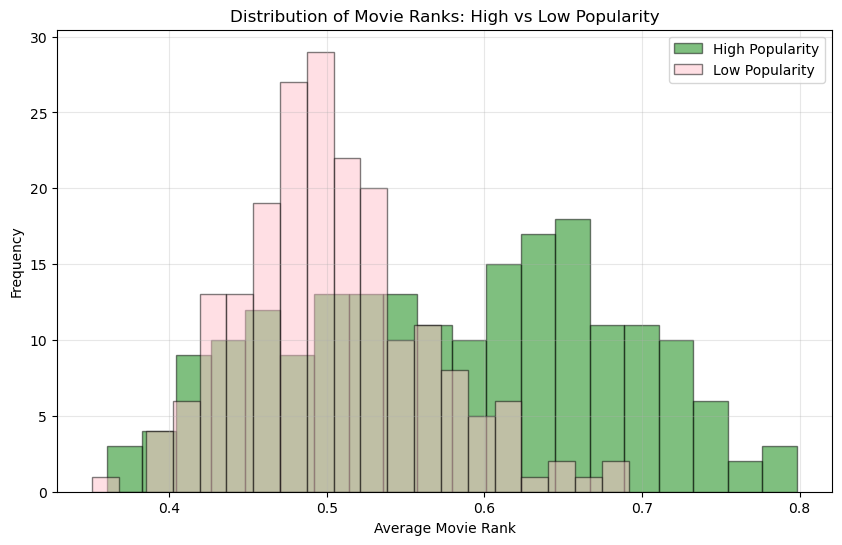

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(high_pop, alpha=0.5, label='High Popularity', bins=20, color='green', edgecolor = 'black')
plt.hist(low_pop, alpha=0.5, label='Low Popularity', bins=20, color='pink', edgecolor = 'black')
plt.xlabel('Average Movie Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ranks: High vs Low Popularity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
u_stat, p_mann = mannwhitneyu(high_pop, low_pop, alternative='greater')
print(f"\nMann-Whitney U statistic: {u_stat}")
print(f"Mann-Whitney P-value: {p_mann:.7f}")


Mann-Whitney U statistic: 28825.0
Mann-Whitney P-value: 0.0000000


#### as the p value is < 0.005 we have sufficient evidence to conclude that we can reject the null hypothesis and conclude that movies that are more popular are rated higher (recieve higher rankings on a scale of 0-1) 

## Question 2: Are movies that are newer rated differently than movies that are older? 

## Required data manipulation
##### Here we used standardised rank transformations to eliminate 'psychological differences' in movie raters. The rank transform was standardised to a 0-1 scale with 1 being the movie which is rated highest by that user. We also do a median split on the movie release date to classify as 'Old' and 'New'

In [28]:
#median split on year
years, movie_titles = [], []
for col in movie_columns:
    try:
        year_str = col[-5:-1]
        year = int(year_str)
        if 1800 <= year <= 2030:
            years.append(year)
        else:
            years.append(None)
    except (ValueError, IndexError):
        years.append(None)
    movie_titles.append(col)
movie_info = pd.DataFrame({
    'title': movie_titles,
    'year': years,
    'column_name': movie_columns
}).dropna(subset=['year'])

median_year = movie_info['year'].median()
movie_info['age_group'] = movie_info['year'].apply(lambda x: 'New' if x > median_year else 'Old')
rating_data = movie[movie_info['column_name']]
ranked_data = rating_data.rank(axis=1, method='average', na_option='keep')
standardized_ranks = ranked_data.div(ranked_data.max(axis=1), axis=0)
avg_standardized_rank = standardized_ranks.mean()
movie_stats = pd.DataFrame({
    'movie': movie_info['title'].values,
    'year': movie_info['year'].values,
    'avg_standardized_rank': avg_standardized_rank.values,
    'age_group': movie_info['age_group'].values
})
old_movies = movie_stats[movie_stats['age_group'] == 'Old']['avg_standardized_rank'].dropna()
new_movies = movie_stats[movie_stats['age_group'] == 'New']['avg_standardized_rank'].dropna()


## Plotting the distribution of standardised movie ranks for new and old movies

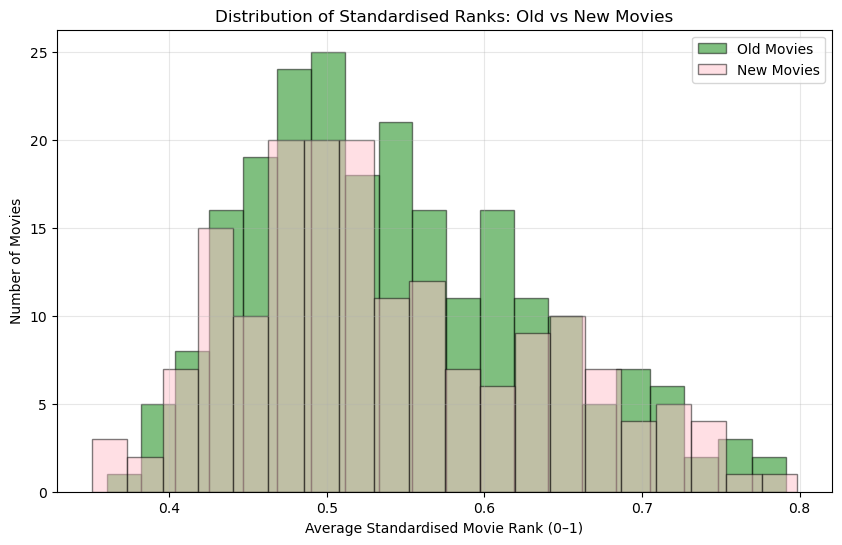

In [29]:
plt.figure(figsize=(10,6))
plt.hist(old_movies, alpha=0.5, label='Old Movies', bins=20, color='green', edgecolor='black')
plt.hist(new_movies, alpha=0.5, label='New Movies', bins=20, color='pink', edgecolor='black')
plt.xlabel('Average Standardised Movie Rank (0–1)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Standardised Ranks: Old vs New Movies')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Mann-Whitney U test
### This test was selected as a non-parametric test as we have ordinal data and don't have to assume normality
##### H0: Do New and Old popularity movies have the same distribution of ratings
##### H1: Are Old vs New movies ranked differently

In [30]:
u_stat, u_p = mannwhitneyu(old_movies, new_movies, alternative='two-sided')
print(f"\nMann-Whitney U statistic (standardised ranks): {u_stat:.4f}")
print(f"Two-tailed P-value (standardised ranks): {u_p:.7f}")


Mann-Whitney U statistic (standardised ranks): 20283.0000
Two-tailed P-value (standardised ranks): 0.5883065


#### as the p value is much greater than 0.005 we have no evidence to show that new and old movies are ranked and therefore rated differently than each other 